# Decision Tree

1. Import Libraries
2. Load Data
3. Understand the Data
4. Data Preprocessing
5. Exploratory Data Analysis
6. Model Building

## 1. Import Libraries

In [1]:
import numpy as np #importing numpy library
import pandas as pd  #importing pandas library
pd.set_option('display.max_rows', 800)   #limiting the max rows and columns
pd.set_option('display.max_columns', 500)

import seaborn as sns  #importing the seaborn library
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

C:\Users\Sanketh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
os.getcwd()

'C:\\Users\\Sanketh\\Desktop\\Decision tree article and loan prediction'

## 2. Load Data

In [4]:
df = pd.read_csv('C:\\Users\\Sanketh\\Desktop\\Decision tree article and loan prediction\\loan_data.csv')

## 3. Understanding the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()  

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')
Categorical columns: 
 Index(['purpose'], dtype='object')


## 4. Data Pre-processing

In [9]:
# Let's do one hot encoding for the column `purpose` as model would be expecting numeric features

df = pd.get_dummies(prefix='purpose',data=df,columns=['purpose'])

In [10]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')
Categorical columns: 
 Index([], dtype='object')


In [11]:
print(df.isna().sum())
print(df.shape)

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64
(9578, 20)


## 5. Exploratory Data Analysis

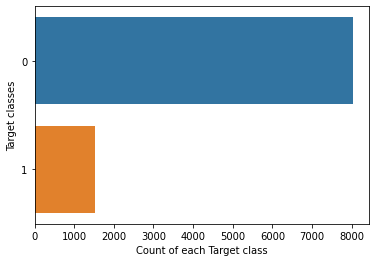

In [12]:
# Check the distribution of y variable to see if it's a case of unbalanced class

sns.countplot(y=df['not.fully.paid'] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

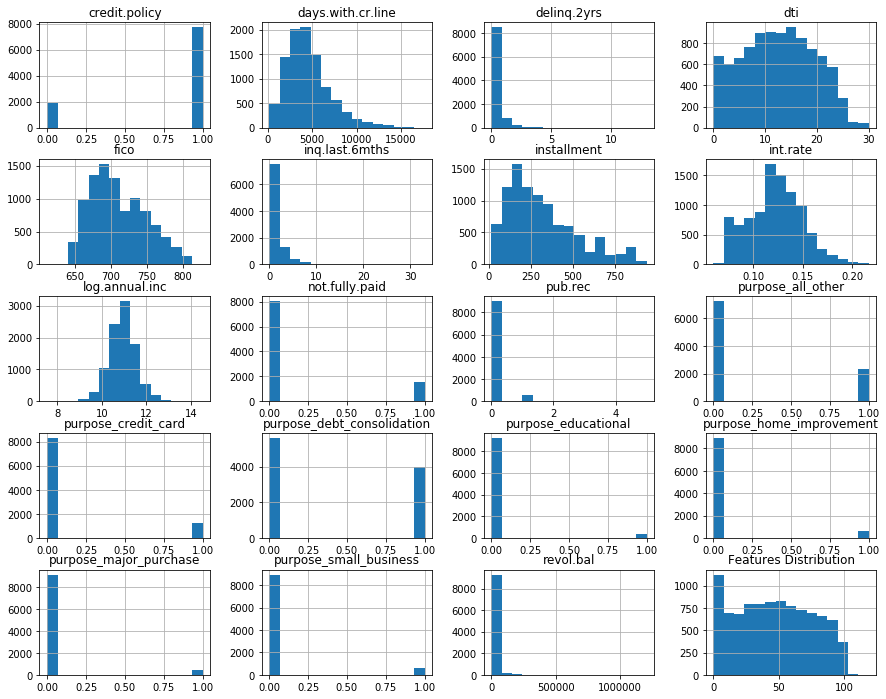

In [14]:
# Check the distribution of all the features

df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

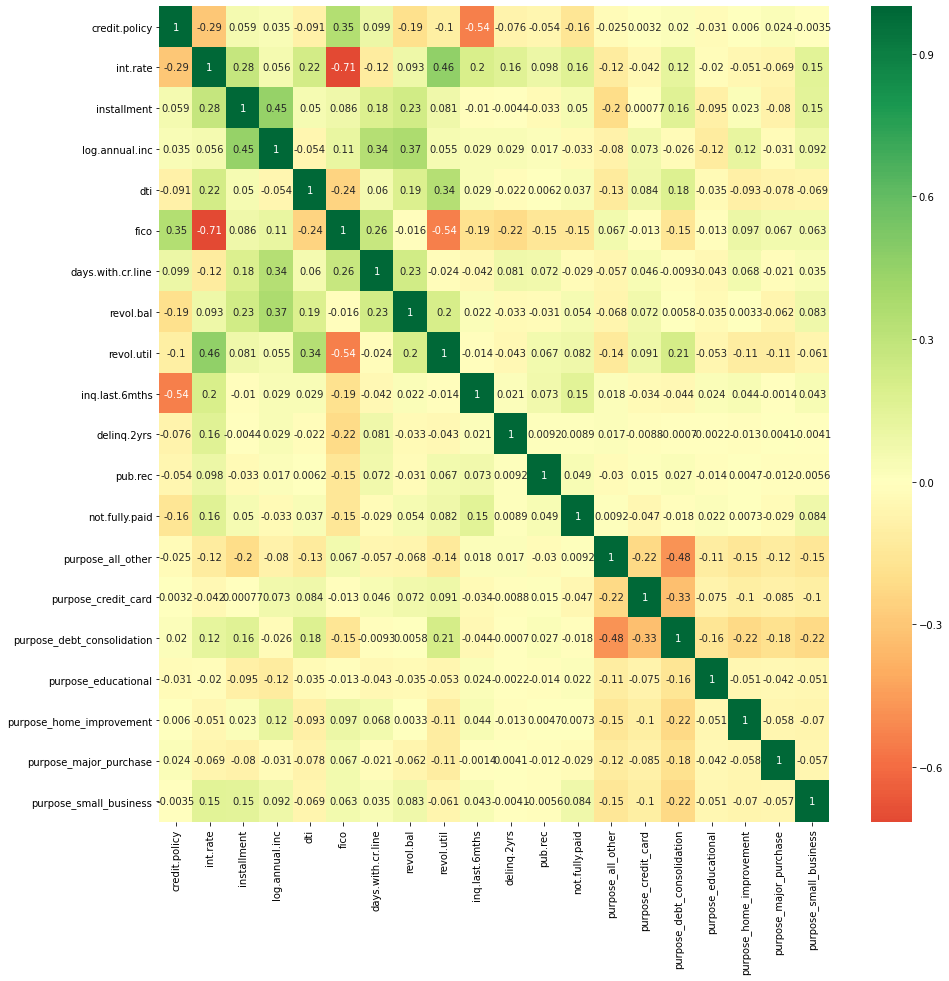

In [13]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0)

## 6. Model Building

In [14]:
# Train test split
X = df.drop(['not.fully.paid'], axis = 1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=500)

## Decision Tree with criterion = gini

In [15]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[2018  374]
 [ 369  113]]

 Accuracy Score : 
  0.7414752957550452

 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      2392
           1       0.23      0.23      0.23       482

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.74      0.74      0.74      2874



## Decision Tree with criterion = entropy

In [16]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[2034  358]
 [ 396   86]]

 Accuracy Score : 
  0.7376478775226165

 Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      2392
           1       0.19      0.18      0.19       482

    accuracy                           0.74      2874
   macro avg       0.52      0.51      0.51      2874
weighted avg       0.73      0.74      0.73      2874

